# Low level fusion

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import math

## Preprocessing

Loading timestamps and distances for tracker and range sensors, timestamps and bounding box information for wheelchiar and drone camera

In [3]:
exp_nr = 1
exp_nr_2 = '01'
df_wheelchair_drone_stamps = pd.read_csv(f'camera_stamps{exp_nr}.csv')
df_wheelchair_temp = pd.read_csv(f'bbox_{exp_nr_2}.csv')
df_drone_temp = pd.read_csv(f'bbox_{exp_nr_2}_drone.csv')
df_range = pd.read_csv(f'range_{exp_nr}.csv')
df_tracker = pd.read_csv(f'tracker{exp_nr}.csv')

Correcting incongruencies in data dimensions between timestamps and frame indices

In [4]:
df_wheelchair_stamps = df_wheelchair_drone_stamps['stamp_w'].head(-4)
df_wheelchair = df_wheelchair_temp.tail(-1)
df_drone = df_drone_temp
df_drone_stamps = df_wheelchair_drone_stamps['stamp_d']

Simple fusion of readings from 4 different distance sensors, the resulting data is the minimum among the 4, so the distance sensor, which is sensing the obstacle the nearest

In [5]:
df_range['distance'] = df_range.min(axis=1)
df_range = df_range.drop(['range_0', 'range_1', 'range_2', 'range_3'], axis=1)

In [6]:
df_wheelchair = df_wheelchair.reset_index(drop=True)
df_drone = df_drone.reset_index(drop=True)
df_drone_stamps = df_drone_stamps.astype(float)

Drop columns related to environmental filters, append previously loaded timestamps

In [7]:
df_wheelchair = df_wheelchair.drop(['bbox_bright', 'bbox_rain', 'bbox_fog'], axis=1)
df_drone = df_drone.drop(['bbox_bright', 'bbox_rain', 'bbox_fog'], axis=1)

df_wheelchair = df_wheelchair.drop(['Unnamed: 0'], axis=1)
df_drone = df_drone.drop(['Unnamed: 0'], axis=1)
df_wheelchair['timestamp'] = df_wheelchair_stamps
df_drone['timestamp'] = df_drone_stamps

Computing distance with triangle similarity

In [8]:
df_wheelchair['distance'] = ((0.24 * 1400) / df_wheelchair['bbox'])
df_drone['distance'] = ((0.24 * 1400) / df_drone['bbox'])

all timestamps are recorded in absolute nano seconds, they are transformed in seconds, relative to the first timestamps of the experiment

In [9]:
df_range.index = (df_range['timestamp'] - df_tracker['timestamp'].min())/1_000_000_000
df_tracker.index = (df_tracker['timestamp'] - df_tracker['timestamp'].min())/1_000_000_000
df_wheelchair.index = (df_wheelchair['timestamp'] - df_tracker['timestamp'].min())/1_000_000_000
df_drone.index = (df_drone['timestamp'] - df_tracker['timestamp'].min())/1_000_000_000

In [10]:
df_wheelchair.to_csv(f'bbox_{exp_nr_2}_wheelchair.csv')

In [11]:
df_wheelchair.rename(columns={'timestamp': 'absolute_timestamp'}, inplace=True)
df_drone.rename(columns={'timestamp': 'absolute_timestamp'}, inplace=True)
df_tracker.rename(columns={'timestamp': 'absolute_timestamp'}, inplace=True)
df_range.rename(columns={'timestamp': 'absolute_timestamp'}, inplace=True)

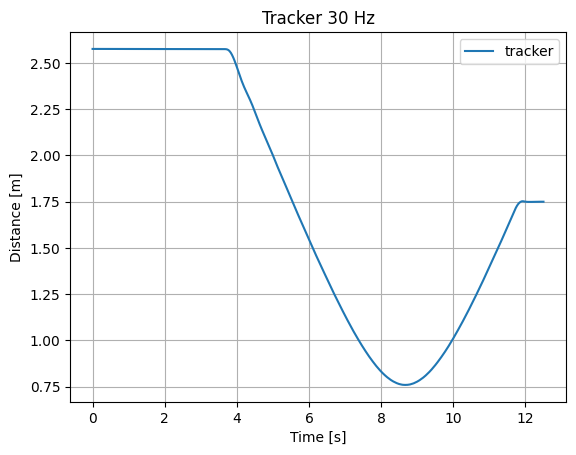

In [12]:
plt.plot(df_tracker.index, df_tracker['distance'], label='tracker')
plt.title('Tracker 30 Hz')
plt.ylabel('Distance [m]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

In [13]:
interval1 = 8.5

In [14]:
df_tracker_ani = df_tracker.loc[3.7:interval1]

C:\Users\CarloGrigioni\AppData\Local\Temp\ipykernel_9016\1565930750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tracker_ani['speed_tracker'] = np.insert(- np.diff(df_tracker_ani['distance'])/np.diff(df_tracker_ani.index), 0, 0)


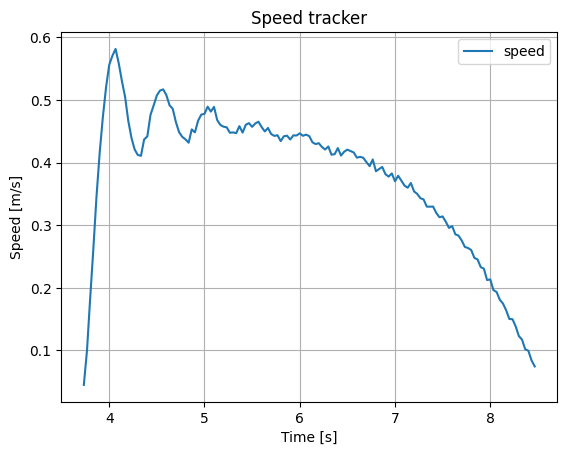

In [15]:
df_tracker_ani['speed_tracker'] = np.insert(- np.diff(df_tracker_ani['distance'])/np.diff(df_tracker_ani.index), 0, 0)
df_tracker_ani = df_tracker_ani.loc[3.71:interval1]
plt.plot(df_tracker_ani.index, df_tracker_ani['speed_tracker'], label='speed')
plt.title('Speed tracker')
plt.ylabel('Speed [m/s]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

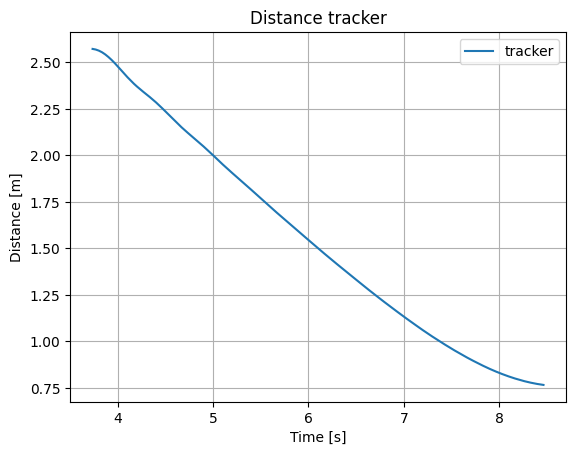

In [16]:
plt.plot(df_tracker_ani.index, df_tracker_ani['distance'], label='tracker')
plt.title('Distance tracker')
plt.ylabel('Distance [m]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

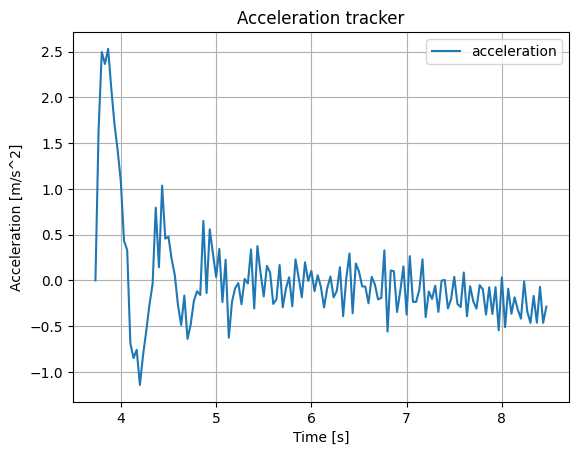

In [17]:
df_tracker_ani['acceleration_tracker'] = np.insert(np.diff(df_tracker_ani['speed_tracker'])/np.diff(df_tracker_ani.index), 0, 0)
plt.plot(df_tracker_ani.index, df_tracker_ani['acceleration_tracker'], label='acceleration')
plt.title('Acceleration tracker')
plt.ylabel('Acceleration [m/s^2]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

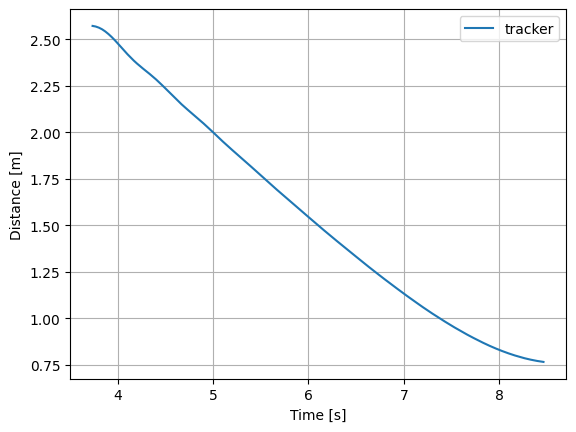

In [18]:
plt.plot(df_tracker_ani.index, df_tracker_ani['distance'], label='tracker')
#plt.plot(df_wheelchair.index, df_wheelchair['distance'], label='wheelchair')
#plt.plot(df_drone.index, df_drone['distance'], label='drone')
#plt.plot(df_range.index, df_range['distance'], label='range')
#plt.title('Distance comparison as from sensors')
plt.ylabel('Distance [m]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

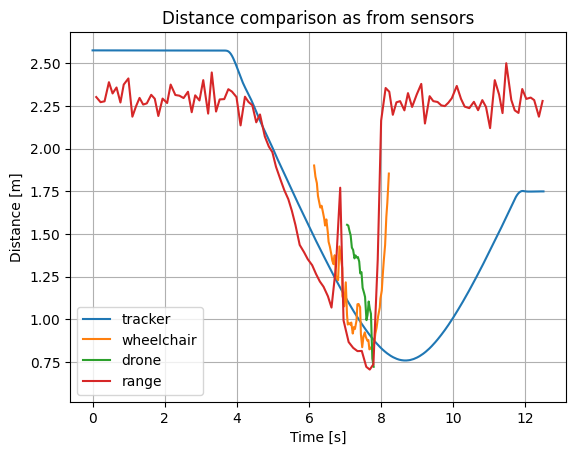

In [19]:
plt.plot(df_tracker.index, df_tracker['distance'], label='tracker')
plt.plot(df_wheelchair.index, df_wheelchair['distance'], label='wheelchair')
plt.plot(df_drone.index, df_drone['distance'], label='drone')
plt.plot(df_range.index, df_range['distance'], label='range')
plt.title('Distance comparison as from sensors')
plt.ylabel('Distance [m]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

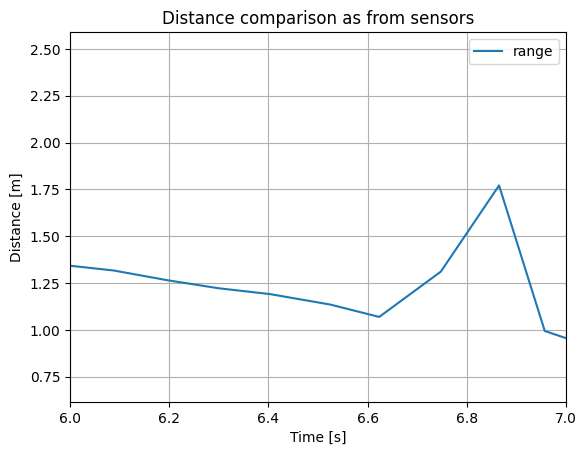

In [20]:
#plt.plot(df_tracker.index, df_tracker['distance'], label='tracker')
#plt.plot(df_wheelchair.index, df_wheelchair['distance'], label='wheelchair')
#plt.plot(df_drone.index, df_drone['distance'], label='drone')
plt.plot(df_range.index, df_range['distance'], label='range')
plt.xlim(6,7)
plt.title('Distance comparison as from sensors')
plt.ylabel('Distance [m]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

In [21]:
df_range.to_csv('range1_tocut.csv')

In [22]:
df_range.loc[6.85:6.875]

,absolute_timestamp,distance
timestamp,,
6.86,1686733108648926720,1.77


In [23]:
df_range = df_range.drop([6.747603968, 6.864980224])

Limit the scope of the experiment to relevant intervals in which the obstacle is approaching

In [24]:
interval0 = 3.71
interval1 = 8.5
df_tracker = df_tracker.loc[interval0:interval1]
df_camera = df_wheelchair.loc[interval0:interval1]
df_camera_drone = df_drone.loc[interval0:interval1]
df_range = df_range.loc[interval0:interval1]

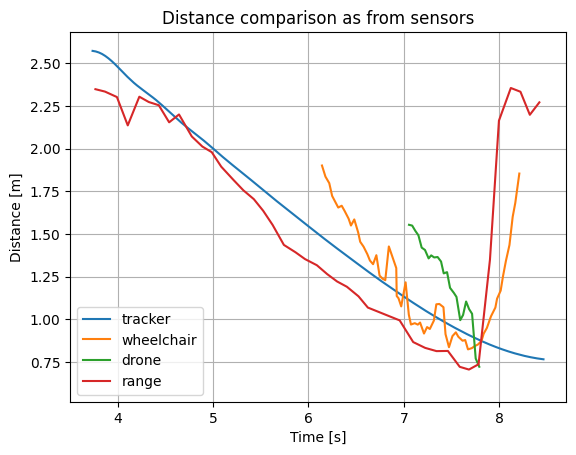

In [25]:
plt.plot(df_tracker.index, df_tracker['distance'], label='tracker')
plt.plot(df_wheelchair.index, df_wheelchair['distance'], label='wheelchair')
plt.plot(df_drone.index, df_drone['distance'], label='drone')
plt.plot(df_range.index, df_range['distance'], label='range')
plt.title('Distance comparison as from sensors')
plt.ylabel('Distance [m]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

max_distance_tracker = df_tracker['distance'].max()

df_range.loc[df_range['distance'] > max_distance_tracker, 'distance'] = np.nan
df_wheelchair.loc[df_wheelchair['distance'] > max_distance_tracker, 'distance'] = np.nan
df_drone.loc[df_drone['distance'] > max_distance_tracker, 'distance'] = np.nan

### Under one hundreds of second "duplicates" (mean)

In [26]:
df_wheelchair.head(10)

,bbox,absolute_timestamp,distance
timestamp,,,
0.52,NaN,1686733102302787584.00,NaN
0.53,NaN,1686733102310386176.00,NaN
0.55,NaN,1686733102337947392.00,NaN
0.59,NaN,1686733102375065344.00,NaN
0.63,NaN,1686733102409086208.00,NaN
0.65,NaN,1686733102437737984.00,NaN
0.69,NaN,1686733102473583872.00,NaN
0.73,NaN,1686733102509386496.00,NaN
0.77,NaN,1686733102549473024.00,NaN


In [27]:
len(df_wheelchair)

361

In [28]:
df_wheelchair.columns

Index(['bbox', 'absolute_timestamp', 'distance'], dtype='object')

In [29]:
df_wheelchair_clean = pd.DataFrame(columns=df_wheelchair.columns)
bad_index = []
for i in range(1, len(df_wheelchair.index)):
    if abs(df_wheelchair.index[i] - df_wheelchair.index[i-1]) >= 0.01:
        df_wheelchair_clean = pd.concat([df_wheelchair_clean, df_wheelchair.iloc[i-1].to_frame().T])

    else:
       #print(df_wheelchair.index[i] - df_wheelchair.index[i-1], i)
       #print(df_wheelchair.index[i-1], df_wheelchair.index[i])
       #print((df_wheelchair.index[i] + df_wheelchair.index[i-1])/2)
       #print((df_wheelchair['distance'].iloc[i] + df_wheelchair['distance'].iloc[i-1])/2)
       index_mean = (df_wheelchair.index[i] + df_wheelchair.index[i - 1]) / 2
       
       temp_dict ={}
       temp_dict['index'] = index_mean
       temp_dict['distance'] = (df_wheelchair['distance'].iloc[i] + df_wheelchair['distance'].iloc[i-1])/2
       temp_dict['bbox'] = (df_wheelchair['bbox'].iloc[i] + df_wheelchair['bbox'].iloc[i-1])/2
       temp_dict['absolute_timestamp'] = (df_wheelchair['absolute_timestamp'].iloc[i] + df_wheelchair['absolute_timestamp'].iloc[i-1])/2
       bad_index.append(df_wheelchair.index[i-1])
       temp = pd.DataFrame(temp_dict, index=[temp_dict['index']])
       df_wheelchair_clean = pd.concat([df_wheelchair_clean, temp.drop(['index'], axis=1)])

In [30]:
df_wheelchair_clean.head(10)

,bbox,absolute_timestamp,distance
0.52,NaN,1686733102306586880.00,NaN
0.53,NaN,1686733102310386176.00,NaN
0.55,NaN,1686733102337947392.00,NaN
0.59,NaN,1686733102375065344.00,NaN
0.63,NaN,1686733102409086208.00,NaN
0.65,NaN,1686733102437737984.00,NaN
0.69,NaN,1686733102473583872.00,NaN
0.73,NaN,1686733102509386496.00,NaN
0.77,NaN,1686733102549473024.00,NaN
0.80,NaN,1686733102586376960.00,NaN


In [31]:
len(bad_index), len(df_wheelchair_clean), len(df_wheelchair)

(3, 360, 361)

In [32]:
df_wheelchair = df_wheelchair.drop(bad_index)

In [33]:
df_drone_clean = pd.DataFrame(columns=df_drone.columns)
bad_index = []
for i in range(1, len(df_drone.index)):
    if abs(df_drone.index[i] - df_drone.index[i-1]) >= 0.01:
        df_drone_clean = pd.concat([df_drone_clean, df_drone.iloc[i-1].to_frame().T])

    else:
       #print(df_wheelchair.index[i] - df_wheelchair.index[i-1], i)
       #print(df_wheelchair.index[i-1], df_wheelchair.index[i])
       #print((df_wheelchair.index[i] + df_wheelchair.index[i-1])/2)
       #print((df_wheelchair['distance'].iloc[i] + df_wheelchair['distance'].iloc[i-1])/2)
       index_mean = (df_drone.index[i] + df_drone.index[i - 1]) / 2
       
       temp_dict ={}
       temp_dict['index'] = index_mean
       temp_dict['distance'] = (df_drone['distance'].iloc[i] + df_drone['distance'].iloc[i-1])/2
       temp_dict['bbox'] = (df_drone['bbox'].iloc[i] + df_drone['bbox'].iloc[i-1])/2
       temp_dict['absolute_timestamp'] = (df_drone['absolute_timestamp'].iloc[i] + df_drone['absolute_timestamp'].iloc[i-1])/2
       bad_index.append(df_drone.index[i-1])
       temp = pd.DataFrame(temp_dict, index=[temp_dict['index']])
       df_drone_clean = pd.concat([df_drone_clean, temp.drop(['index'], axis=1)])

In [34]:
len(bad_index), len(df_drone_clean), len(df_drone)

(0, 365, 366)

In [35]:
df_drone = df_drone.drop(bad_index)

### Smoothing

Apply rolling average with the previous n values, 5 for the range sensor, and 2 for the cameras, in order to reduce outliers

In [36]:
df_range['distance'] = df_range['distance'].rolling(window=5).mean()
df_wheelchair['distance'] = df_wheelchair['distance'].rolling(window=2).mean()
df_drone['distance'] = df_drone['distance'].rolling(window=2).mean()

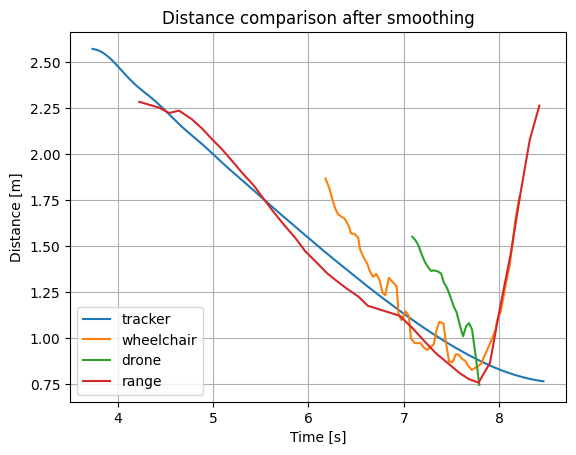

In [37]:
plt.plot(df_tracker.index, df_tracker['distance'], label='tracker')
plt.plot(df_wheelchair.index, df_wheelchair['distance'], label='wheelchair')
plt.plot(df_drone.index, df_drone['distance'], label='drone')
plt.plot(df_range.index, df_range['distance'], label='range')
plt.title('Distance comparison after smoothing')
plt.ylabel('Distance [m]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

Change in naming of columns to prepare for merging tables

In [38]:
df_tracker = df_tracker.rename(columns={'distance': 'distance_tracker','absolute_timestamp': 'absolute_timestamp_tracker'})
df_range = df_range.rename(columns={'distance': 'distance_range','absolute_timestamp': 'absolute_timestamp_range'})
df_wheelchair = df_wheelchair.rename(columns={'distance': 'distance_wheelchair','absolute_timestamp': 'absolute_timestamp_wheelchair', 'bbox': 'bbox_wheelchair'})
df_drone = df_drone.rename(columns={'distance': 'distance_drone','absolute_timestamp': 'absolute_timestamp_drone', 'bbox': 'bbox_drone'})

### Speed and acceleration calculation

#### Tracker

In [39]:
df_tracker['speed_tracker'] = np.insert(- np.diff(df_tracker['distance_tracker'])/np.diff(df_tracker.index), 0, 0)
df_tracker = df_tracker.loc[4.1:interval1] # To avoid 0 in the experiment and clean acceleration

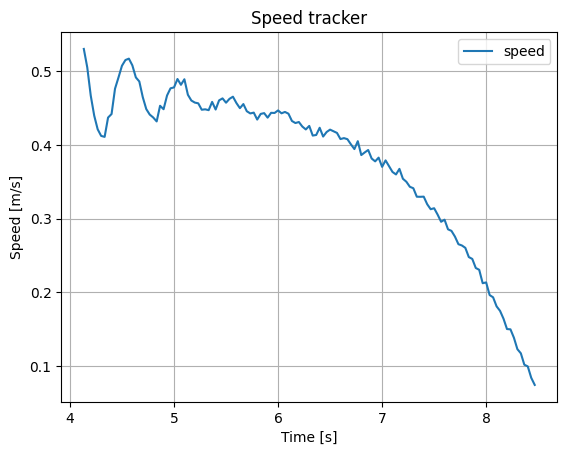

In [40]:
plt.plot(df_tracker.index, df_tracker['speed_tracker'], label='speed')
plt.title('Speed tracker')
plt.ylabel('Speed [m/s]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

In [41]:
df_tracker['acceleration_tracker'] = np.insert(np.diff(df_tracker['speed_tracker'])/np.diff(df_tracker.index), 0, 0)

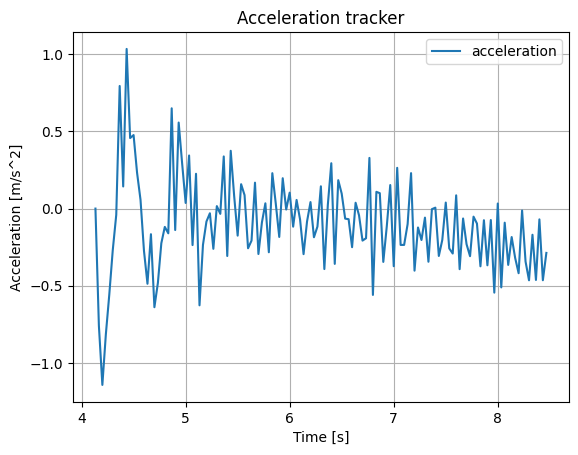

In [42]:
plt.plot(df_tracker.index, df_tracker['acceleration_tracker'], label='acceleration')
plt.title('Acceleration tracker')
plt.ylabel('Acceleration [m/s^2]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

#### Range

In [43]:
df_range['speed_range'] = np.insert(- np.diff(df_range['distance_range'])/np.diff(df_range.index), 0, 0)
max_speed = 3.5
min_speed = 0 # We assume the obstacle is not going backwards
df_range['speed_range'] = np.clip(df_range['speed_range'], a_min=min_speed, a_max=max_speed)

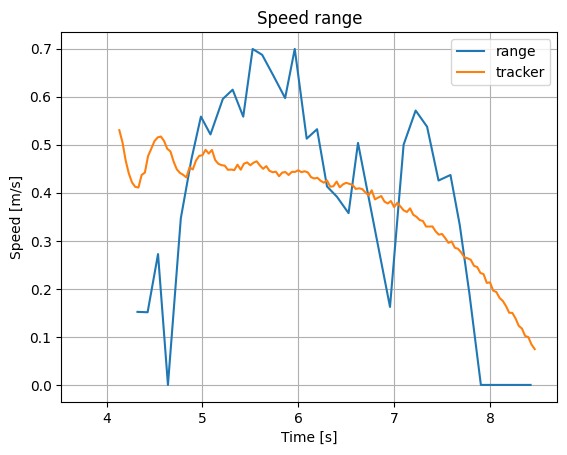

In [44]:
plt.plot(df_range.index, df_range['speed_range'], label='range')
plt.plot(df_tracker.index, df_tracker['speed_tracker'], label='tracker')
plt.title('Speed range')
plt.ylabel('Speed [m/s]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

In [45]:
df_range['acceleration_range'] = np.insert(np.diff(df_range['speed_range'])/np.diff(df_range.index), 0, 0)

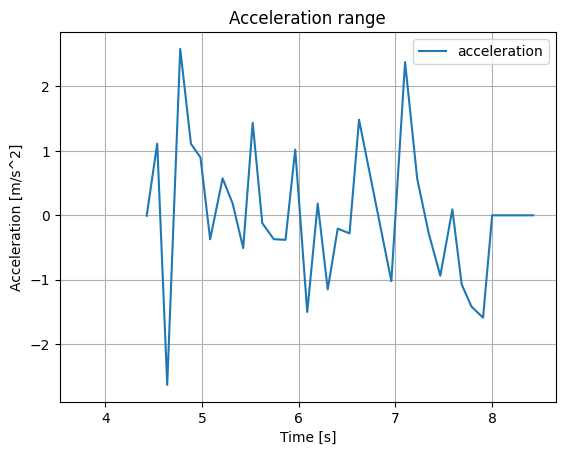

In [46]:
plt.plot(df_range.index, df_range['acceleration_range'], label='acceleration')
plt.title('Acceleration range')
plt.ylabel('Acceleration [m/s^2]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

#### Wheelchair

All speed values are capped to 3.5 m/s, which is the maximum speed for robomaster robots. It is also capped at 0 m/s due to the assumption the obstacle never goes backwards

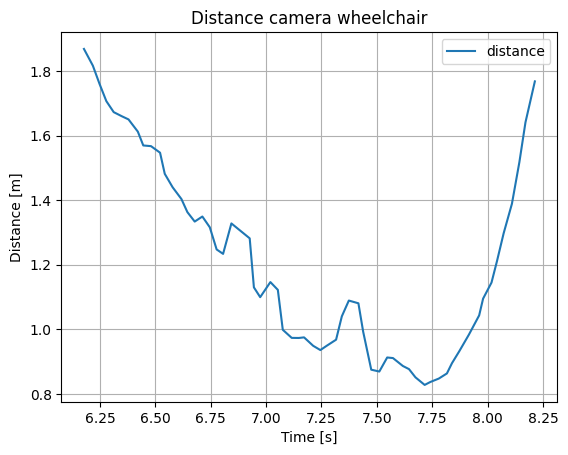

In [47]:
plt.plot(df_wheelchair.index, df_wheelchair['distance_wheelchair'], label='distance')
plt.title('Distance camera wheelchair')
plt.ylabel('Distance [m]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

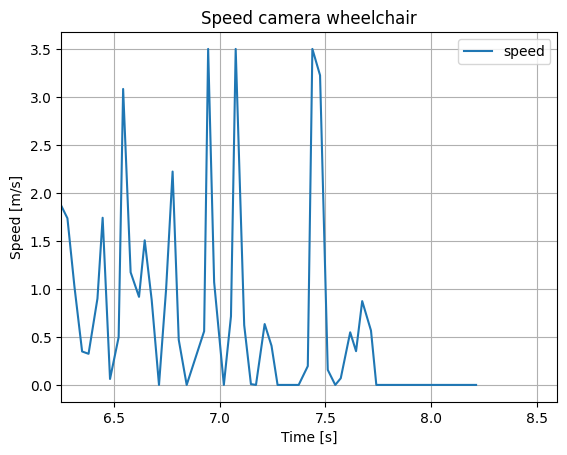

In [48]:
df_wheelchair['speed_wheelchair'] = np.insert(- np.diff(df_wheelchair['distance_wheelchair'])/np.diff(df_wheelchair.index), 0, 0)

max_speed = 3.5
min_speed = 0 # We assume the obstacle is not going backwards
df_wheelchair['speed_wheelchair'] = np.clip(df_wheelchair['speed_wheelchair'], a_min=min_speed, a_max=max_speed)

plt.plot(df_wheelchair.index, df_wheelchair['speed_wheelchair'], label='speed')
plt.title('Speed camera wheelchair')
plt.xlim(6.25)
plt.ylabel('Speed [m/s]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

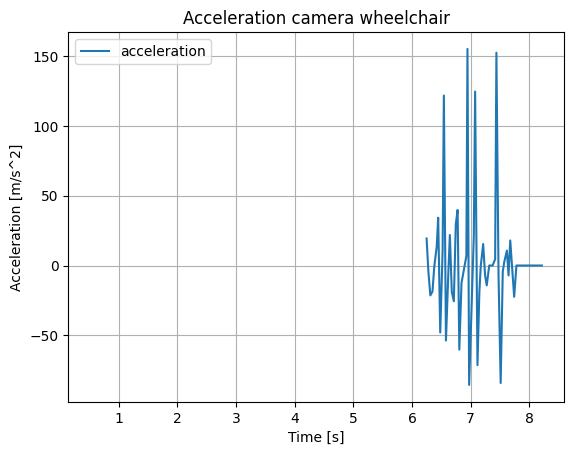

In [49]:
df_wheelchair['acceleration_wheelchair'] = np.insert(np.diff(df_wheelchair['speed_wheelchair'])/np.diff(df_wheelchair.index), 0, 0)
plt.plot(df_wheelchair.index, df_wheelchair['acceleration_wheelchair'], label='acceleration')
plt.title('Acceleration camera wheelchair')
plt.ylabel('Acceleration [m/s^2]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

#### Drone

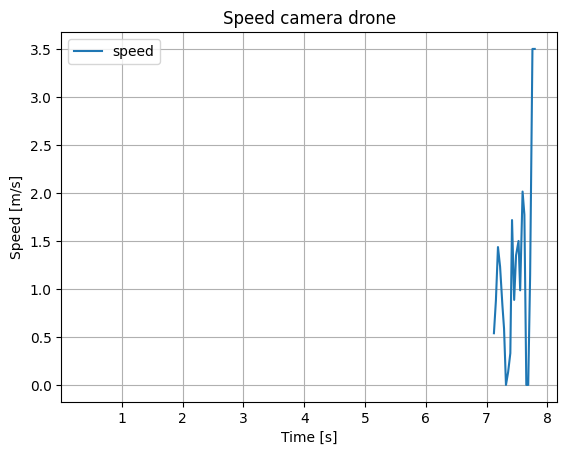

In [50]:
df_drone['speed_drone'] = np.insert(- np.diff(df_drone['distance_drone'])/np.diff(df_drone.index), 0, 0)
max_speed = 3.5
min_speed = 0
df_drone['speed_drone'] = np.clip(df_drone['speed_drone'], a_min=min_speed, a_max=max_speed)
plt.plot(df_drone.index, df_drone['speed_drone'], label='speed')
plt.title('Speed camera drone')
plt.ylabel('Speed [m/s]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

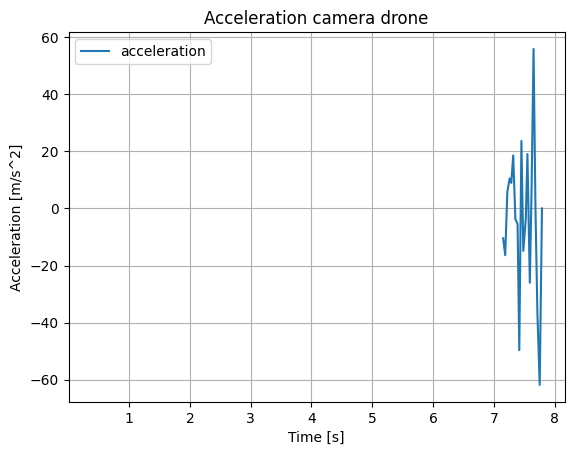

In [51]:
df_drone['acceleration_drone'] = np.insert(-np.diff(df_drone['speed_drone'])/np.diff(df_drone.index), 0, 0)
plt.plot(df_drone.index, df_drone['acceleration_drone'], label='acceleration')
plt.title('Acceleration camera drone')
plt.ylabel('Acceleration [m/s^2]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

## Danger Function

import math
def d_f(distance):
    if distance <= 0:
        return 0
    return 1 / math.log(distance + 0.6)

def d_s(speed):
    if speed < 0.05:
        return 0
    if speed > 1:
        return 1
    return (speed-0.05)/0.95

def d_a(acceleration):
    if acceleration < 1 and acceleration > -1: # -1 < a < 1
        return 1
    elif acceleration < -1:
        return 0.9
    else:
        return 1.1
    
def danger_function_speed(row, sensor ,k1 = 1, k2 = 1, k3 = 1):
    distance = row[f'distance_{sensor}']+ 0.000001
    speed = row[f'speed_{sensor}']
    acceleration = row[f'acceleration_{sensor}']
    distance_factor = d_f(distance)
    speed_factor = d_s(speed)
    acceleration_factor = d_a(acceleration)
    return speed_factor
def danger_function_composed(row, sensor ,k1 = 1, k2 = 1, k3 = 1):
    distance = row[f'distance_{sensor}'] + 0.000001
    speed = row[f'speed_{sensor}']
    acceleration = row[f'acceleration_{sensor}']
    distance_factor = d_f(distance)
    speed_factor = d_s(speed)
    acceleration_factor = d_a(acceleration)
    return (speed_factor * acceleration_factor) * distance_factor

In [52]:
def d_f(distance):
    if distance <= 0:
        return 0
    return 1 / math.log(distance + 0.6)

def d_s(speed):
    s_min = 0.05
    s_max = 0.5
    if speed <= s_min:
        return 0
    if speed >= s_max:
        return 1
    return (speed-s_min)/(s_max - s_min)

def d_a(acceleration):
    a_min = 1
    a_max = 10
    if acceleration <= - a_max:
        return -1
    elif -a_max < acceleration <= -a_min:
        return (acceleration+a_min)/(a_max - a_min)
    elif -a_min < acceleration <= +a_min:
        return 0
    elif a_min < acceleration <= +a_max:
        return (acceleration - a_min)/(a_max - a_min)
    elif acceleration > a_max:
        return 1
    return 0
    #if acceleration < 1 and acceleration > -1: # -1 < a < 1
        #return 1
    #elif acceleration < -1:
        #return 0.9
    #else:
        #return 1.1

def danger_function_distance(row, sensor ,k1 = 1, k2 = 1, k3 = 1):
    distance = row[f'distance']+ 0.000001
    speed = row[f'speed']
    acceleration = row[f'acceleration']
    distance_factor = d_f(distance)
    speed_factor = d_s(speed)
    acceleration_factor = d_a(acceleration)
    return distance_factor

def danger_function_speed(row, sensor ,k1 = 1, k2 = 1, k3 = 1):
    distance = row[f'distance']+ 0.000001
    speed = row[f'speed']
    acceleration = row[f'acceleration']
    distance_factor = d_f(distance)
    speed_factor = d_s(speed)
    acceleration_factor = d_a(acceleration)
    return speed_factor

def danger_function_acceleration(row, sensor ,k1 = 1, k2 = 1, k3 = 1):
    distance = row[f'distance']+ 0.000001
    speed = row[f'speed']
    acceleration = row[f'acceleration']
    distance_factor = d_f(distance)
    speed_factor = d_s(speed)
    acceleration_factor = d_a(acceleration)
    return acceleration_factor

def danger_function_composed(row,sensor ,k1 = 0.1):
    distance = row[f'distance_{sensor}'] + 0.000001
    speed = row[f'speed_{sensor}']
    acceleration = row[f'acceleration_{sensor}']
    distance_factor = d_f(distance)
    speed_factor = d_s(speed)
    acceleration_factor = d_a(acceleration)
    return (speed_factor + k1 * acceleration_factor) * distance_factor

In [128]:
df_tracker['danger_tracker'] = df_tracker.apply(lambda row: danger_function_composed(row, 'tracker'), axis=1)

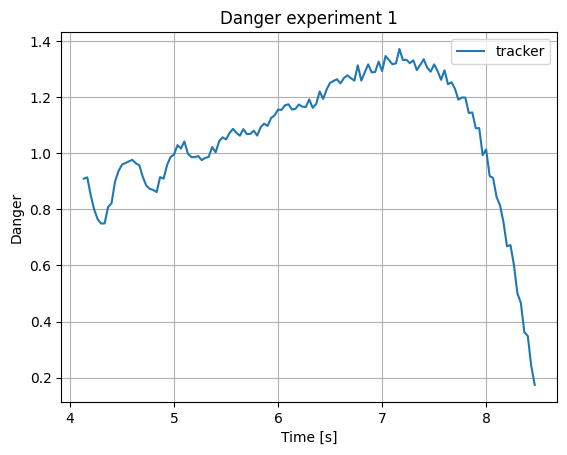

In [174]:
plt.plot(df_tracker.index, df_tracker['danger_tracker'], label='tracker')
plt.title('Danger experiment 1')
plt.ylabel('Danger')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

## Fusion

### Merge data

Data from all sensors is merged in a complete table via full outer merge on timestamp

In [54]:
df_temp = df_wheelchair.merge(df_tracker, on='timestamp', how='outer')
df_temp_cam = df_temp.merge(df_drone, on='timestamp', how='outer')
df = df_temp_cam.merge(df_range, on='timestamp', how='outer')
df.sort_values(by=['timestamp'])

,bbox_wheelchair,absolute_timestamp_wheelchair,distance_wheelchair,speed_wheelchair,acceleration_wheelchair,absolute_timestamp_tracker,distance_tracker,speed_tracker,acceleration_tracker,bbox_drone,absolute_timestamp_drone,distance_drone,speed_drone,acceleration_drone,absolute_timestamp_range,distance_range,speed_range,acceleration_range
timestamp,,,,,,,,,,,,,,,,,,
0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1686733102157523968.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN
0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1686733102179217920.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1686733102214053888.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1686733102250241024.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1686733102284216576.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12.43,NaN,1686733114217100288.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1686733114227546368.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12.47,NaN,1686733114255219968.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


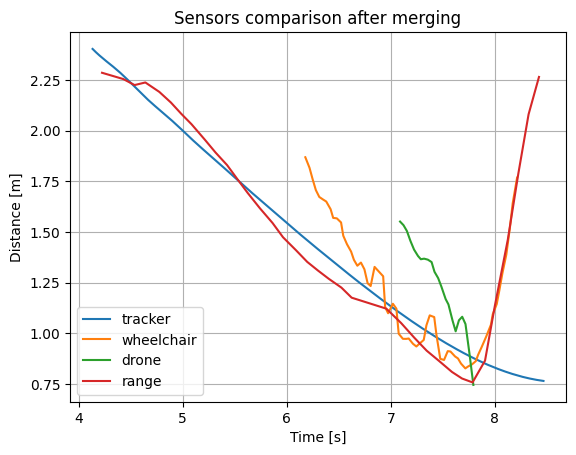

In [55]:
plt.plot(df.index, df['distance_tracker'], label='tracker')
plt.plot(df.index, df['distance_wheelchair'], label='wheelchair')
plt.plot(df.index, df['distance_drone'], label='drone')
plt.plot(df.index, df['distance_range'], label='range')

plt.title('Sensors comparison after merging')
plt.ylabel('Distance [m]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

All timestamps are then rounded to milliseconds

In [56]:
df.index = np.round(df.index, 3)

#### Resampling

To resample to 100 Hz index is truncated to the next hundreds of seconds, so rounded by excess. Then the timeline is completed with missing timestamps

In [57]:
df_100 = df.copy()
df_100.index= df_100.index*100
df_100.index = np.trunc(df_100.index)
df_100.index = df_100.index+1
df_100.index = df_100.index/100

We drop some rows used in the previous steps, and no more of interest

In [58]:
df_100 = df_100.drop(['bbox_wheelchair', 'bbox_drone', 'absolute_timestamp_wheelchair', 'absolute_timestamp_tracker','absolute_timestamp_drone','absolute_timestamp_range'], axis=1)

All timestamps which were not in the data are added to index

In [59]:
to_add = np.arange(df_100.index.sort_values()[0], df_100.index.sort_values()[-1], step=0.01)
to_add = np.round(to_add, 2)
for item in to_add:
    if item not in df_100.index:
        new_row = pd.DataFrame(index=[item], columns=df_100.columns)
        new_row[:] = np.nan 
        df_100 = df_100.append(new_row)

C:\Users\CarloGrigioni\AppData\Local\Temp\ipykernel_9016\2492213484.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_100 = df_100.append(new_row)
C:\Users\CarloGrigioni\AppData\Local\Temp\ipykernel_9016\2492213484.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_100 = df_100.append(new_row)
C:\Users\CarloGrigioni\AppData\Local\Temp\ipykernel_9016\2492213484.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_100 = df_100.append(new_row)
C:\Users\CarloGrigioni\AppData\Local\Temp\ipykernel_9016\2492213484.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_100 = df_100.append(new_row)
C:\Users\CarloGrigioni\AppData\Local

In [60]:
df_100.duplicated().sum()

1051

We create a new column of boolean values, which respresents in which timestamps data was received from the relative sensor

In [61]:
df_100['wheelchair_data'] = df_100['distance_wheelchair'].notnull()
df_100['drone_data'] = df_100['distance_drone'].notnull()
df_100['tracker_data'] = df_100['distance_tracker'].notnull()
df_100['range_data'] = df_100['distance_range'].notnull()

In [62]:
df_100 = df_100.sort_index()

All data is forward filled, so that the last valid value is reported in following rows, until a new valid value is introduced

In [63]:
df_100= df_100.ffill()

In [64]:
df_100 = df_100[~df_100.index.duplicated(keep='last')]

In [65]:
df_100.index.duplicated().sum()

0

In [66]:
df_100 = df_100.loc[interval0:interval1]

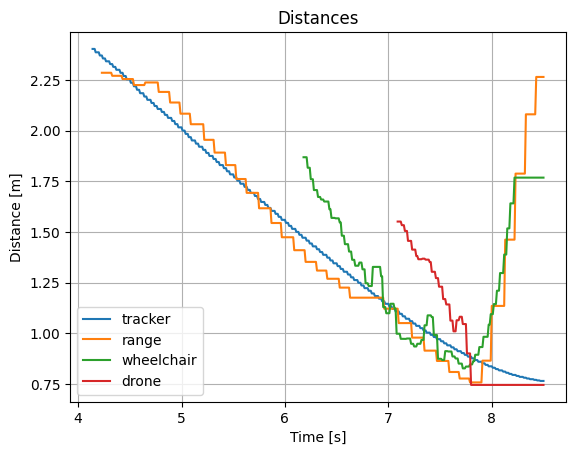

In [67]:
plt.plot(df_100.index, df_100['distance_tracker'], label='tracker')
plt.plot(df_100.index, df_100['distance_range'], label='range')
plt.plot(df_100.index, df_100['distance_wheelchair'], label='wheelchair')
plt.plot(df_100.index, df_100['distance_drone'], label='drone')
plt.legend()
plt.title('Distances')
plt.ylabel('Distance [m]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

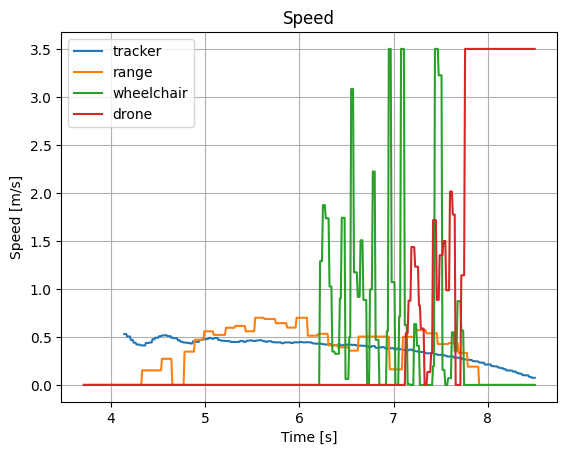

In [68]:
plt.plot(df_100.index, df_100['speed_tracker'], label='tracker')
plt.plot(df_100.index, df_100['speed_range'], label='range')
plt.plot(df_100.index, df_100['speed_wheelchair'], label='wheelchair')
plt.plot(df_100.index, df_100['speed_drone'], label='drone')
plt.legend()
plt.title('Speed')
plt.ylabel('Speed [m/s]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

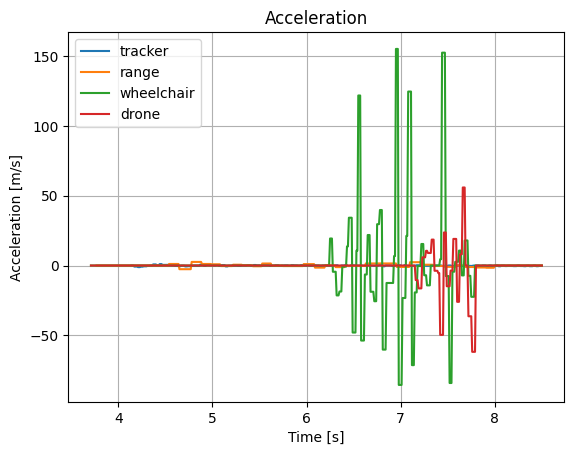

In [69]:
plt.plot(df_100.index, df_100['acceleration_tracker'], label='tracker')
plt.plot(df_100.index, df_100['acceleration_range'], label='range')
plt.plot(df_100.index, df_100['acceleration_wheelchair'], label='wheelchair')
plt.plot(df_100.index, df_100['acceleration_drone'], label='drone')
plt.legend()
plt.title('Acceleration')
plt.ylabel('Acceleration [m/s]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

#### Distance fusion

In [70]:
df_100['distance_fusion'] = df_100[['distance_wheelchair','distance_drone','distance_range']].mean(axis=1)
#df_100['speed_fusion'] = df_100[['speed_wheelchair','speed_drone','speed_range']].mean(axis=1)
df_100['speed_fusion'] = np.insert(- np.diff(df_100['distance_fusion'])/np.diff(df_100.index), 0, 0)
df_100['acceleration_fusion'] = np.insert(- np.diff(df_100['speed_fusion'])/np.diff(df_100.index), 0, 0)
#df_100['acceleration_fusion'] = df_100[['acceleration_wheelchair','acceleration_drone','acceleration_range']].mean(axis=1)

In [71]:
dist = df_100['distance_fusion']*(df_100['wheelchair_data'] | df_100['drone_data'] | df_100['range_data']).astype(int)
dist = dist.replace(0, np.nan)
dist

3.71   NaN
3.72   NaN
3.73   NaN
3.74   NaN
3.75   NaN
        ..
8.46   NaN
8.47   NaN
8.48   NaN
8.49   NaN
8.50   NaN
Length: 480, dtype: float64

In [72]:
stamps = df_100.index*(df_100['wheelchair_data'] | df_100['drone_data'] | df_100['range_data']).astype(int)
stamps = stamps.replace(0, np.nan)
stamps

3.71   NaN
3.72   NaN
3.73   NaN
3.74   NaN
3.75   NaN
        ..
8.46   NaN
8.47   NaN
8.48   NaN
8.49   NaN
8.50   NaN
Length: 480, dtype: float64

In [73]:
df_speed = pd.DataFrame(dist, index=stamps, columns=['distance_fusion'])
df_speed = df_speed.dropna()

In [74]:
df_speed['speed_fusion'] = np.insert(- np.diff(df_speed['distance_fusion'])/np.diff(df_speed.index), 0, 0)
max_speed = 3.5
min_speed = 0 # We assume the obstacle is not going backwards
df_speed['speed_fusion'] = np.clip(df_speed['speed_fusion'], a_min=min_speed, a_max=max_speed)


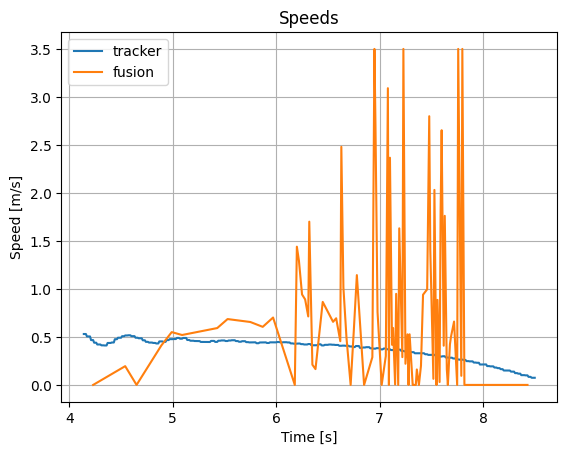

In [75]:
plt.plot(df_100.index, df_100['speed_tracker'], label='tracker')
plt.plot(df_speed.index, df_speed['speed_fusion'], label='fusion')
plt.legend()
plt.title('Speeds')
plt.ylabel('Speed [m/s]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

In [76]:
df_100['speed_fusion'] = df_speed['speed_fusion']
df_100['speed_fusion'] = df_100['speed_fusion'].ffill()

In [77]:
df_speed['acceleration_fusion'] = np.insert(- np.diff(df_speed['speed_fusion'])/np.diff(df_speed.index), 0, 0)

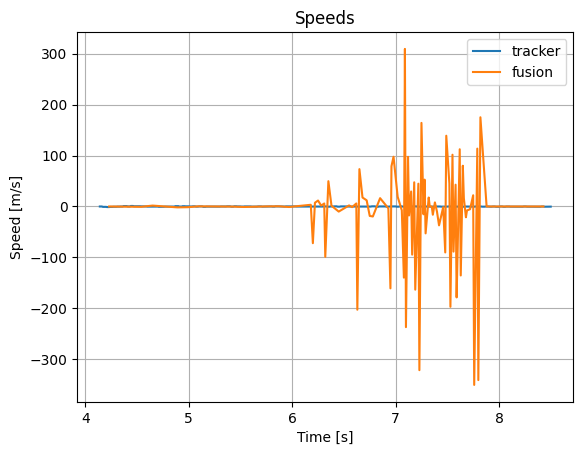

In [78]:
plt.plot(df_100.index, df_100['acceleration_tracker'], label='tracker')
plt.plot(df_speed.index, df_speed['acceleration_fusion'], label='fusion')
plt.legend()
plt.title('Speeds')
plt.ylabel('Speed [m/s]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

In [79]:
df_100['acceleration_fusion'] = df_speed['acceleration_fusion']
df_100['acceleration_fusion'] = df_100['acceleration_fusion'].ffill()

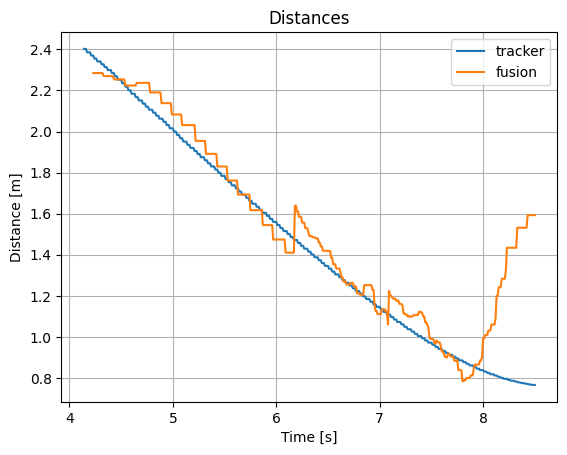

In [80]:
plt.plot(df_100.index, df_100['distance_tracker'], label='tracker')
plt.plot(df_100.index, df_100['distance_fusion'], label='fusion')
plt.legend()
plt.title('Distances')
plt.ylabel('Distance [m]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

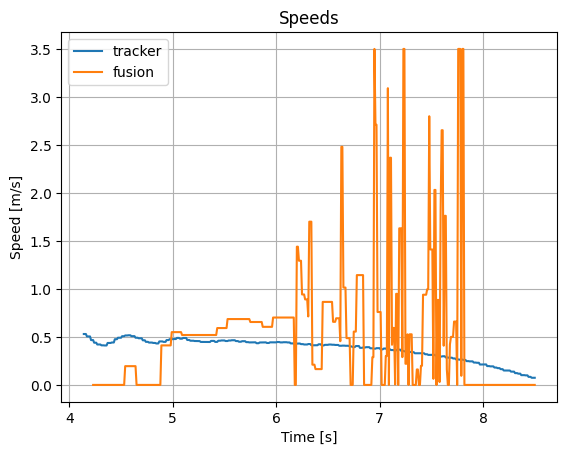

In [81]:
plt.plot(df_100.index, df_100['speed_tracker'], label='tracker')
plt.plot(df_100.index, df_100['speed_fusion'], label='fusion')
plt.legend()
plt.title('Speeds')
plt.ylabel('Speed [m/s]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

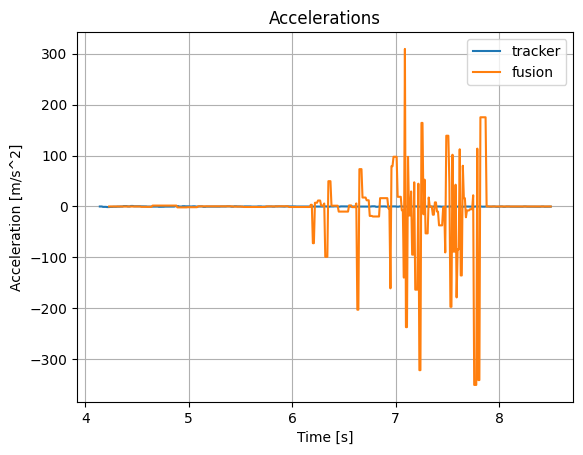

In [82]:
plt.plot(df_100.index, df_100['acceleration_tracker'], label='tracker')
plt.plot(df_100.index, df_100['acceleration_fusion'], label='fusion')
plt.legend()
plt.title('Accelerations')
plt.ylabel('Acceleration [m/s^2]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

In [83]:
df_100['danger_fusion'] = df_100.apply(lambda row: danger_function_composed(row, 'fusion'), axis=1)
df_100['danger_tracker'] = df_100.apply(lambda row: danger_function_composed(row, 'tracker'), axis=1)

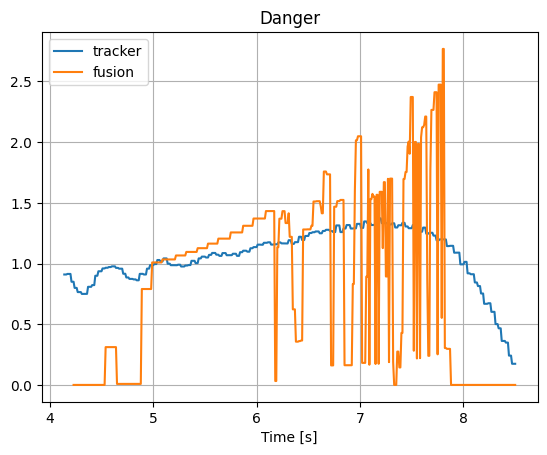

In [84]:
plt.plot(df_100.index, df_100['danger_tracker'], label='tracker')
plt.plot(df_100.index, df_100['danger_fusion'], label='fusion')
plt.legend()
plt.title('Danger')
plt.ylabel('')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

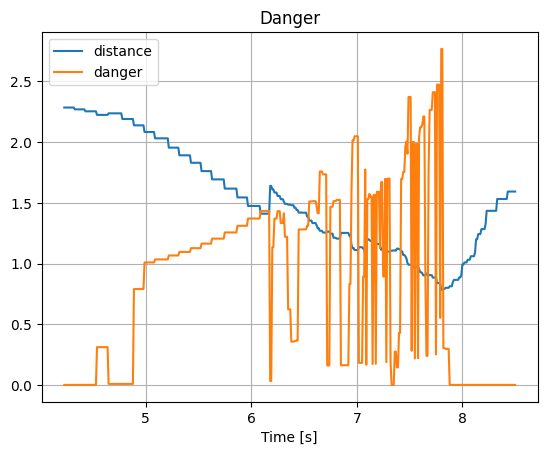

In [85]:
plt.plot(df_100.index, df_100['distance_fusion'], label='distance')
plt.plot(df_100.index, df_100['danger_fusion'], label='danger')
plt.legend()
plt.title('Danger')
plt.ylabel('')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

In [129]:
df_100['danger_fusion'] = df_100['danger_fusion'].rolling(window=20).mean()

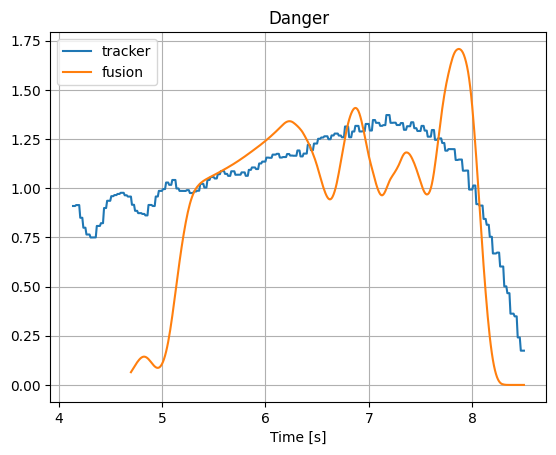

In [130]:
plt.plot(df_100.index, df_100['danger_tracker'], label='tracker')
plt.plot(df_100.index, df_100['danger_fusion'], label='fusion')
plt.legend()
plt.title('Danger')
plt.ylabel('')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

In [131]:
first_valid_index = df_100['danger_fusion'].first_valid_index()
first_valid_index

4.7

In [132]:
from sklearn.metrics import mean_squared_error
y_actual = df_100['danger_tracker'].loc[first_valid_index:]
y_pred = df_100['danger_fusion'].loc[first_valid_index:]
MSE = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(MSE)
MSE, rmse

(0.135542554987601, 0.3681610449077971)

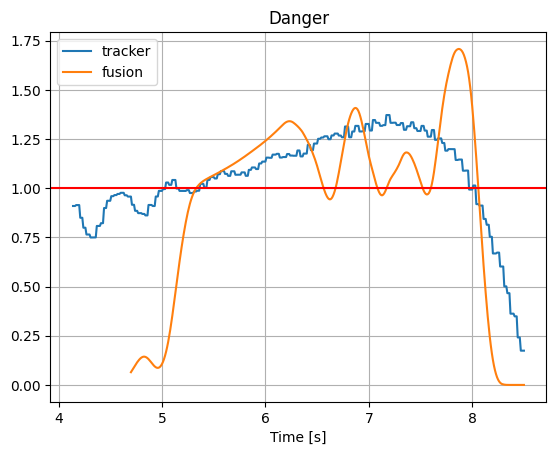

In [133]:
plt.plot(df_100.index, df_100['danger_tracker'], label='tracker')
plt.plot(df_100.index, df_100['danger_fusion'], label='fusion')
plt.axhline(1, color = 'red')
plt.legend()
plt.title('Danger')
plt.ylabel('')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
truth = df_100['danger_tracker'].loc[first_valid_index:] < 1
decision = df_100['danger_fusion'].loc[first_valid_index:] < 1 #memory of the semaphore
accuracy = accuracy_score(truth, decision)
precision = precision_score(truth, decision)
recall = recall_score(truth, decision)

accuracy, precision, recall

(0.8792650918635171, 0.7279411764705882, 0.9166666666666666)

In [135]:
truth

4.70    True
4.71    True
4.72    True
4.73    True
4.74    True
        ... 
8.46    True
8.47    True
8.48    True
8.49    True
8.50    True
Name: danger_tracker, Length: 381, dtype: bool

#### Confidence

In [136]:
#first_valid_distance_wheelchair = df_100['distance_wheelchair'].first_valid_index()

In [137]:
confidence = []
value = 0
for i,item in enumerate(df_100['wheelchair_data']):
    if item is np.NaN:
        value = np.nan
    if item is True:
        if df_100['speed_wheelchair'].iloc[i] > df_100['speed_wheelchair'].quantile(0.97) or df_100['speed_wheelchair'].iloc[i] < df_100['speed_wheelchair'].quantile(0.03):
            value = 0
        value=1
    if item == False:
        value = value -0.15
        if value < 0:
            value = 0

    confidence.append(value)
df_100['wheelchair_confidence'] = np.round(confidence, 2)

In [138]:
first_non_zero_index = df_100.index[df_100['wheelchair_confidence'] != 0][0]
df_100.loc[:first_non_zero_index, 'wheelchair_confidence'] = np.nan

In [139]:
confidence = []
value = 0
for i,item in enumerate(df_100['drone_data']):
    if item is np.NaN:
        value = np.nan
    if item is True:
        if df_100['speed_drone'].iloc[i] > df_100['speed_drone'].quantile(0.97) or df_100['speed_drone'].iloc[i] < df_100['speed_drone'].quantile(0.03):
            value = 0
        else:
            value=1
    if item == False:
        value = value -0.15
        if value < 0:
            value = 0

    confidence.append(value)
df_100['drone_confidence'] = np.round(confidence, 2)

In [140]:
first_non_zero_index = df_100.index[df_100['drone_confidence'] != 0][0]
df_100.loc[:first_non_zero_index, 'drone_confidence'] = np.nan

In [141]:
confidence = []
value = 0
for i,item in enumerate(df_100['range_data']):
    if item is np.NaN:
        value = np.nan
    if item is True:
        if df_100['speed_range'].iloc[i] > df_100['speed_range'].quantile(0.97) or df_100['speed_range'].iloc[i] < df_100['speed_range'].quantile(0.03):
            value = 0
        else:
            value=1
    if item == False:
        value = value -0.05
        if value < 0:
            value = 0

    confidence.append(value)
df_100['range_confidence'] = np.round(confidence, 2)

In [142]:
first_non_zero_index = df_100.index[df_100['range_confidence'] != 0][0]
df_100.loc[:first_non_zero_index, 'range_confidence'] = np.nan

In [143]:
df_100['drone_confidence']

3.71    NaN
3.72    NaN
3.73    NaN
3.74    NaN
3.75    NaN
       ... 
8.46   0.00
8.47   0.00
8.48   0.00
8.49   0.00
8.50   0.00
Name: drone_confidence, Length: 480, dtype: float64

In [144]:
confidence = []
value = 0
for item in df_100['tracker_data']:
    value=1
    confidence.append(value)
df_100['tracker_confidence'] = np.round(confidence, 2)

In [145]:
#weights_sum = np.nansum(df_100[['wheelchair_confidence', 'drone_confidence', 'range_confidence']], axis=1)
weights_sum = (df_100[['wheelchair_confidence', 'drone_confidence', 'range_confidence']]).sum(axis=1)

mask = weights_sum != 0

first_non_zero_index = weights_sum.index[weights_sum.values != 0][0]
weights_sum.loc[:first_non_zero_index] = np.nan
df_100['distance_wheelchair_conf'] = df_100['distance_wheelchair'] * df_100['wheelchair_confidence'] 
df_100['distance_drone_conf'] = df_100['distance_drone'] * df_100['drone_confidence']
df_100['distance_range_conf'] = df_100['distance_range'] * df_100['range_confidence']
df_100['distance_fusion_conf'] = (df_100[['distance_wheelchair_conf', 'distance_drone_conf', 'distance_range_conf']].sum(axis=1))/weights_sum

In [146]:
df_100['distance_wheelchair']

3.71    NaN
3.72    NaN
3.73    NaN
3.74    NaN
3.75    NaN
       ... 
8.46   1.77
8.47   1.77
8.48   1.77
8.49   1.77
8.50   1.77
Name: distance_wheelchair, Length: 480, dtype: float64

In [147]:
df_100['distance_fusion_conf']

3.71    NaN
3.72    NaN
3.73    NaN
3.74    NaN
3.75    NaN
       ... 
8.46   2.26
8.47   2.26
8.48   2.26
8.49   2.26
8.50   2.26
Name: distance_fusion_conf, Length: 480, dtype: float64

In [148]:
weights_sum

3.71    NaN
3.72    NaN
3.73    NaN
3.74    NaN
3.75    NaN
       ... 
8.46   0.85
8.47   0.80
8.48   0.75
8.49   0.70
8.50   0.65
Length: 480, dtype: float64

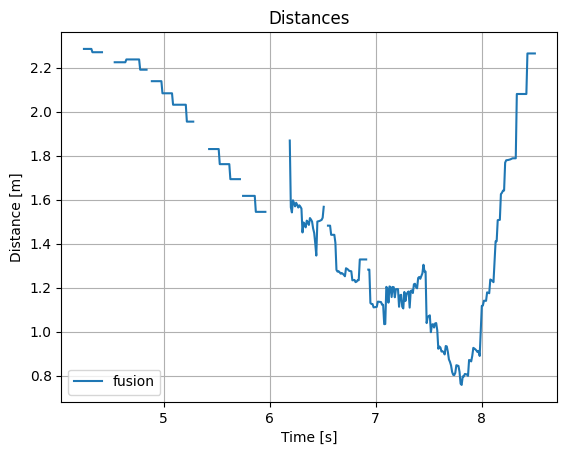

In [149]:
#plt.plot(df_100.index, df_100['distance_tracker'], label='tracker')
#plt.plot(df_100.index, df_100['distance_fusion'], label='fusion')
plt.plot(df_100.index, df_100['distance_fusion_conf'], label='fusion')
plt.legend()
plt.title('Distances')
plt.ylabel('Distance [m]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

In [150]:
#df_100['speed_fusion_conf'] = np.insert(- np.diff(df_100['distance_fusion_conf'])/np.diff(df_100.index), 0, 0)
#df_100['acceleration_fusion_conf'] = np.insert(- np.diff(df_100['speed_fusion_conf'])/np.diff(df_100.index), 0, 0)

In [151]:
#df_100['distance_fusion_conf'] = (df_100['distance_wheelchair']*df_100['wheelchair_confidence']+df_100['distance_drone']*df_100['drone_confidence']+df_100['distance_range']*df_100['range_confidence'])/(df_100['drone_confidence']+df_100['wheelchair_confidence']+df_100['range_confidence'])
#df_100['speed_fusion_conf'] = (df_100['speed_wheelchair']*df_100['wheelchair_confidence']+df_100['speed_drone']*df_100['drone_confidence']+df_100['speed_range']*df_100['range_confidence'])/(df_100['drone_confidence']+df_100['wheelchair_confidence']+df_100['range_confidence'])
#df_100['acceleration_fusion_conf'] = (df_100['acceleration_wheelchair']*df_100['wheelchair_confidence']+df_100['acceleration_drone']*df_100['drone_confidence']+df_100['acceleration_range']*df_100['range_confidence'])/(df_100['drone_confidence']+df_100['wheelchair_confidence']+df_100['range_confidence'])

In [152]:
dist = df_100['distance_fusion_conf']*(df_100['wheelchair_data'] | df_100['drone_data'] | df_100['range_data']).astype(int)
dist = dist.replace(0, np.nan)
dist

3.71   NaN
3.72   NaN
3.73   NaN
3.74   NaN
3.75   NaN
        ..
8.46   NaN
8.47   NaN
8.48   NaN
8.49   NaN
8.50   NaN
Length: 480, dtype: float64

In [153]:
stamps = df_100.index*(df_100['wheelchair_data'] | df_100['drone_data'] | df_100['range_data']).astype(int)
stamps = stamps.replace(0, np.nan)
stamps

3.71   NaN
3.72   NaN
3.73   NaN
3.74   NaN
3.75   NaN
        ..
8.46   NaN
8.47   NaN
8.48   NaN
8.49   NaN
8.50   NaN
Length: 480, dtype: float64

In [154]:
df_speed = pd.DataFrame(dist, index=stamps, columns=['distance_fusion_conf'])
df_speed = df_speed.dropna()

In [155]:
df_speed['speed_fusion_conf'] = np.insert(- np.diff(df_speed['distance_fusion_conf'])/np.diff(df_speed.index), 0, 0)
max_speed = 3.5
min_speed = 0 # We assume the obstacle is not going backwards
df_speed['speed_fusion_conf'] = np.clip(df_speed['speed_fusion_conf'], a_min=min_speed, a_max=max_speed)

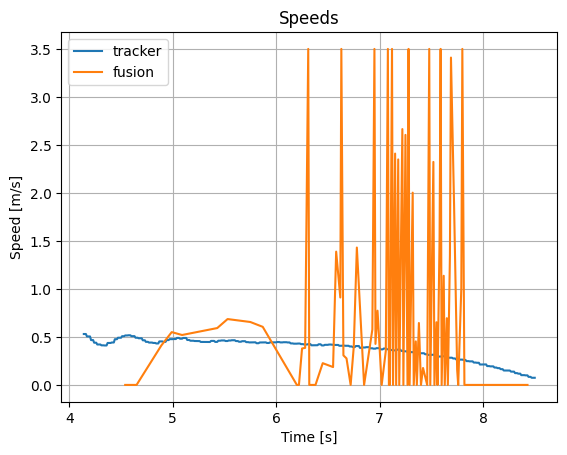

In [156]:
plt.plot(df_100.index, df_100['speed_tracker'], label='tracker')
plt.plot(df_speed.index, df_speed['speed_fusion_conf'], label='fusion')
plt.legend()
plt.title('Speeds')
plt.ylabel('Speed [m/s]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

In [157]:
df_100['speed_fusion_conf'] = df_speed['speed_fusion_conf']
df_100['speed_fusion_conf'] = df_100['speed_fusion_conf'].ffill()
df_100['distance_fusion_conf'] = df_100['distance_fusion_conf'].ffill()

In [158]:
df_speed['acceleration_fusion_conf'] = np.insert(- np.diff(df_speed['speed_fusion_conf'])/np.diff(df_speed.index), 0, 0)

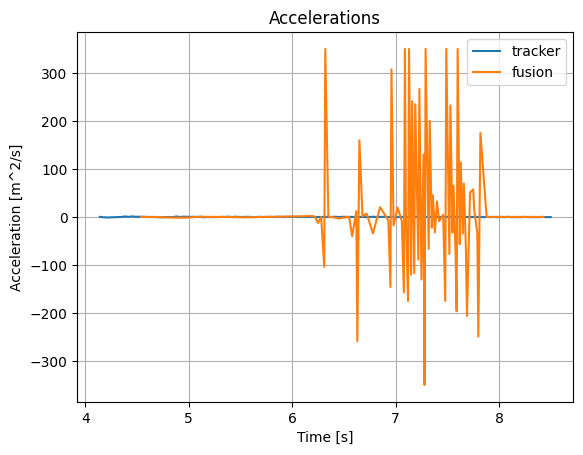

In [159]:
plt.plot(df_100.index, df_100['acceleration_tracker'], label='tracker')
plt.plot(df_speed.index, df_speed['acceleration_fusion_conf'], label='fusion')
plt.legend()
plt.title('Accelerations')
plt.ylabel('Acceleration [m^2/s]')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

In [160]:
df_100['acceleration_fusion_conf'] = df_speed['acceleration_fusion_conf']
df_100['acceleration_fusion_conf'] = df_100['acceleration_fusion_conf'].ffill()

In [161]:
df_100['danger_fusion_conf'] = df_100.apply(lambda row: danger_function_composed(row, 'fusion_conf'), axis=1)

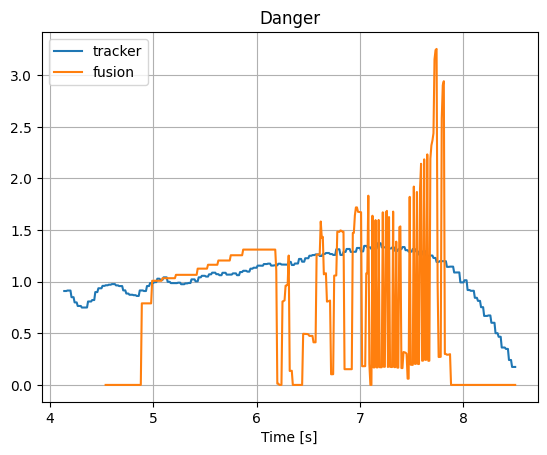

In [162]:
plt.plot(df_100.index, df_100['danger_tracker'], label='tracker')
plt.plot(df_100.index, df_100['danger_fusion_conf'], label='fusion')
plt.legend()
plt.title('Danger')
plt.ylabel('')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

In [163]:
df_100.columns

Index(['distance_wheelchair', 'speed_wheelchair', 'acceleration_wheelchair',
       'distance_tracker', 'speed_tracker', 'acceleration_tracker',
       'distance_drone', 'speed_drone', 'acceleration_drone', 'distance_range',
       'speed_range', 'acceleration_range', 'wheelchair_data', 'drone_data',
       'tracker_data', 'range_data', 'distance_fusion', 'speed_fusion',
       'acceleration_fusion', 'danger_fusion', 'danger_tracker',
       'wheelchair_confidence', 'drone_confidence', 'range_confidence',
       'tracker_confidence', 'distance_wheelchair_conf', 'distance_drone_conf',
       'distance_range_conf', 'distance_fusion_conf', 'speed_fusion_conf',
       'acceleration_fusion_conf', 'danger_fusion_conf'],
      dtype='object')

In [164]:
df_100['distance_fusion_conf'].tail()

8.46   2.26
8.47   2.26
8.48   2.26
8.49   2.26
8.50   2.26
Name: distance_fusion_conf, dtype: float64

In [165]:
df_100['danger_fusion_conf'] = df_100.apply(lambda row: danger_function_composed(row, 'fusion_conf'), axis=1)

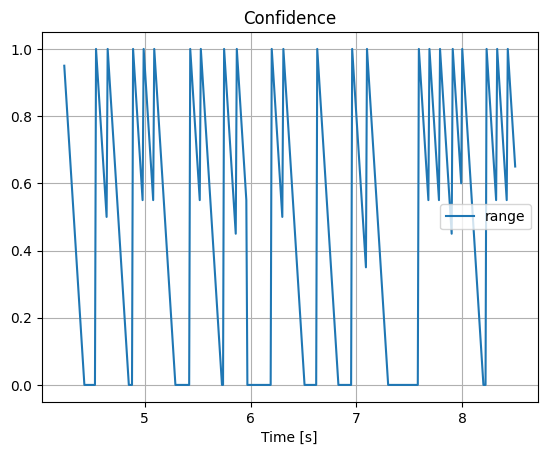

In [166]:
plt.plot(df_100.index, df_100['range_confidence'], label='range')
#plt.plot(df_100.index, df_100['danger_fusion_conf'], label='fusion confidence')
plt.legend()
plt.title('Confidence')
plt.ylabel('')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

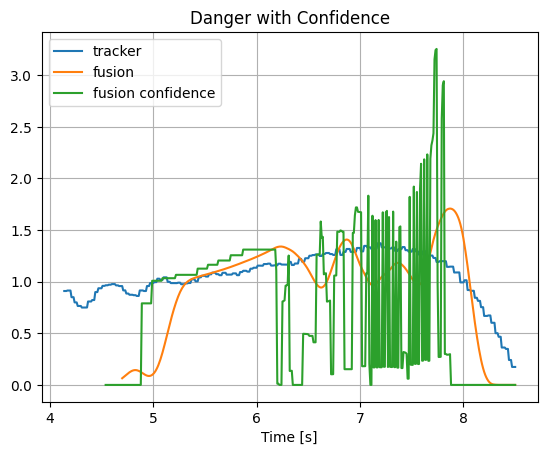

In [167]:
plt.plot(df_100.index, df_100['danger_tracker'], label='tracker')
plt.plot(df_100.index, df_100['danger_fusion'], label='fusion')
plt.plot(df_100.index, df_100['danger_fusion_conf'], label='fusion confidence')
plt.legend()
plt.title('Danger with Confidence')
plt.ylabel('')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

In [172]:
df_100['danger_fusion_conf'] = df_100['danger_fusion_conf'].rolling(window=20).mean()

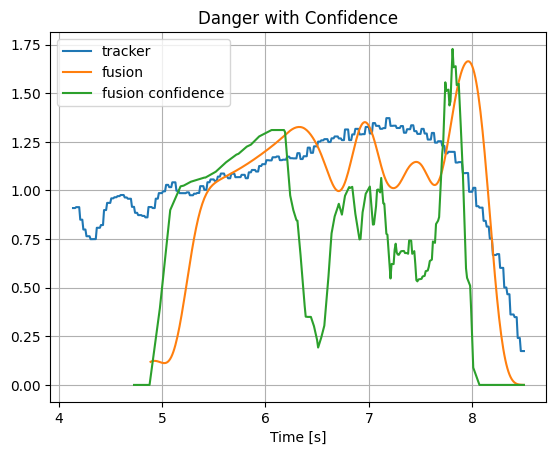

In [173]:
plt.plot(df_100.index, df_100['danger_tracker'], label='tracker')
plt.plot(df_100.index, df_100['danger_fusion'], label='fusion')
plt.plot(df_100.index, df_100['danger_fusion_conf'], label='fusion confidence')
plt.legend()
plt.title('Danger with Confidence')
plt.ylabel('')
plt.xlabel('Time [s]')
plt.grid()
plt.legend()

In [169]:
first_valid_index = df_100['danger_fusion_conf'].first_valid_index()
first_valid_index

4.54

In [170]:
from sklearn.metrics import mean_squared_error
y_actual = df_100['danger_tracker'].loc[first_valid_index:]
y_pred = df_100['danger_fusion_conf'].loc[first_valid_index:]
MSE = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(MSE)
MSE, rmse

(0.5362703657905122, 0.7323048311943)